In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import squarify

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
file = "../DataSets Grandes/Covid/Covid19Casos.csv"
print("Datos actualizados al 01/06/21")
## Fuente: http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina

Datos actualizados al 01/06/21


In [3]:
file = "../DataSets Grandes/Covid/Covid19Casos.zip"

In [4]:
today = datetime.strftime(datetime.date(datetime.today()),"%Y-%m-%d")

In [5]:
file_vacunas = '../DataSets Grandes/Covid/datos_nomivac_covid19.csv'
print("Datos actualizados al",today)

Datos actualizados al 2021-07-15


In [6]:
data = pd.read_csv(file)

In [7]:
data = pd.read_csv(file, compression='zip')

In [125]:
data_vacunas = pd.read_csv(file_vacunas)
## Fuente: https://www.buenosaires.gob.ar/coronavirus/datos/vacunacion
## Fuente: https://datos.gob.ar/dataset/salud-vacunas-contra-covid-19-dosis-aplicadas-republica-argentina---registro-desagregado

In [7]:
data.head(4)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-05-28
1,10000000,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2021-05-28
2,10000001,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2021-05-28
3,10000002,F,44.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2021-05-28


In [8]:
data_vacunas.head(4)

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,F,60-69,Buenos Aires,6,Moreno,560,Buenos Aires,6,General Rodríguez,364,2021-01-26,Sputnik,>60,1,486081120R
1,F,50-59,Buenos Aires,6,Azul,49,Buenos Aires,6,Azul,49,2021-01-26,Sputnik,Salud,1,486081120R
2,M,70-79,Buenos Aires,6,La Plata,441,Buenos Aires,6,La Plata,441,2021-01-22,Sputnik,Salud,1,486081120R
3,F,18-29,Buenos Aires,6,Tres Arroyos,833,Buenos Aires,6,Tres Arroyos,833,2021-01-15,Sputnik,Salud,1,486081120R


In [9]:
data_vacunas.jurisdiccion_residencia.unique()

array(['Buenos Aires', 'Entre Ríos', 'Mendoza', 'CABA', 'Santa Fe',
       'Chubut', 'Corrientes', 'Salta', 'San Luis', 'Chaco', 'Río Negro',
       'Santiago del Estero', 'Tucumán', 'Córdoba', 'Jujuy', 'Misiones',
       'San Juan', 'La Rioja', 'La Pampa', 'Formosa', 'Neuquén',
       'Santa Cruz', 'Catamarca', 'Tierra del Fuego', 'S.I.'],
      dtype=object)

In [126]:
data_vacunas.drop(columns=['depto_residencia_id', 'depto_aplicacion_id','jurisdiccion_residencia_id','jurisdiccion_aplicacion_id','lote_vacuna'], inplace=True)
data_vacunas.sample(3)

,sexo,grupo_etario,jurisdiccion_residencia,depto_residencia,jurisdiccion_aplicacion,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
4456216,M,70-79,S.I.,S.I.,Tucumán,Capital,2021-04-05,AstraZeneca,60 o más años,2
10243904,F,60-69,La Pampa,Capital,La Pampa,Capital,2021-04-21,AstraZeneca,60 o más años,1
427660,F,18-29,Salta,Rosario de Lerma,Salta,Rosario de Lerma,2021-07-03,Sinopharm,18 a 39 años SIN Factores de Riesgo,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11813655 entries, 0 to 11813654
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  

In [11]:
data.isnull().sum()

id_evento_caso                             0
sexo                                       0
edad                                    5456
edad_años_meses                            0
residencia_pais_nombre                     0
residencia_provincia_nombre                0
residencia_departamento_nombre             0
carga_provincia_nombre                     0
fecha_inicio_sintomas                9595672
fecha_apertura                             2
sepi_apertura                              0
fecha_internacion                   14565408
cuidado_intensivo                          0
fecha_cui_intensivo                 14874493
fallecido                                  0
fecha_fallecimiento                 14824010
asistencia_respiratoria_mecanica           0
carga_provincia_id                         0
origen_financiamiento                      0
clasificacion                              0
clasificacion_resumen                      0
residencia_provincia_id                    0
fecha_diag

In [12]:
data.shape

(14941529, 25)

In [8]:
data.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [13]:
data = data.drop(columns = ["carga_provincia_id","residencia_provincia_id","residencia_departamento_id","id_evento_caso","asistencia_respiratoria_mecanica","fecha_inicio_sintomas","fecha_internacion"])

In [14]:
data.shape

(14941529, 18)

In [16]:
data.head(5)

,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,ultima_actualizacion
0,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,2020-06-01,23,NO,NaN,NO,NaN,Privado,Caso Descartado,Descartado,2020-06-09,2021-05-28
1,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-05-28
2,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-05-28
3,F,44.0,Años,Argentina,Buenos Aires,La Matanza,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-06,2021-05-28
4,F,33.0,Años,Argentina,CABA,COMUNA 01,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-05-28


In [10]:
data[['edad', 'edad_años_meses','clasificacion_resumen','fallecido']][data.edad_años_meses != 'Años'].groupby('fallecido').sum()

,edad
fallecido,
NO,204658.00000
SI,505.00000


In [13]:
## Quitamos los menores de 1 año del DS porque tienen una mortalidad muy baja y las causas podrían haber sido de otra índole ajena al COVID

In [15]:
data = data[data.edad_años_meses == 'Años']
data = data.drop(columns = "edad_años_meses")
data.head(5)

,sexo,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,ultima_actualizacion
0,M,54.00000,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,2020-06-01,23,NO,NaN,NO,NaN,Privado,Caso Descartado,Descartado,2020-06-09,2021-07-15
1,F,52.00000,Argentina,CABA,SIN ESPECIFICAR,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-07-15
2,F,22.00000,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-07-15
3,F,44.00000,Argentina,Buenos Aires,La Matanza,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-06,2021-07-15
4,F,34.00000,Argentina,CABA,COMUNA 01,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-07-15


In [21]:
data.clasificacion.value_counts()

Caso Descartado                                                                              6055928
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                        2298106
Caso con resultado negativo-no conclusivo - No activo                                         385579
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)     256674
Caso sospechoso - No Activo - Con muestra sin resultado concluyente                           172124
Caso sospechoso - No Activo - Sin muestra                                                     159212
Caso confirmado por laboratorio - Activo                                                      135678
Caso confirmado por laboratorio - Activo Internado                                            125942
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                        76703
Caso confirmado por laboratorio - Fallecido                                                

In [172]:
#data.fecha_diagnostico.dropna(inplace=True)

In [16]:
data.clasificacion_resumen[data.fecha_diagnostico.isna()==False].value_counts(normalize=True)

Descartado   0.62225
Confirmado   0.30951
Sospechoso   0.06824
Name: clasificacion_resumen, dtype: float64

In [17]:
data.clasificacion_resumen.value_counts(normalize=True)

Descartado        0.603661
Confirmado        0.309350
Sospechoso        0.086963
Sin Clasificar    0.000026
Name: clasificacion_resumen, dtype: float64

In [17]:
#Regex
caso_conf = "Caso confirmado"
caso_sosp = "Caso sospechoso"
caso_desc = "Caso Descartado"
reg_caso_conf = re.compile(caso_conf)
reg_caso_sosp = re.compile(caso_sosp)
reg_caso_desc = re.compile(caso_desc)

In [25]:
re.findall(reg_caso_conf,data.clasificacion[0])

[]

In [26]:
re.findall(caso_desc,data.clasificacion[0])

['Caso Descartado']

In [28]:
data.clasificacion_resumen.value_counts()

Descartado        6074759
Confirmado        2973509
Sospechoso         840784
Sin Clasificar        241
Name: clasificacion_resumen, dtype: int64

In [13]:
print ("Mortalidad entre los casos positivos:")
data.fallecido[data.clasificacion_resumen=="Confirmado"].value_counts(normalize=True)

Mortalidad entre los casos positivos:


NO   0.97498
SI   0.02502
Name: fallecido, dtype: float64

In [18]:
data.edad[data.edad>110].value_counts()

121.00000     559
221.00000      41
120.00000      38
111.00000      14
119.00000       4
112.00000       4
1024.00000      3
118.00000       3
1944.00000      2
113.00000       2
114.00000       2
116.00000       1
117.00000       1
115.00000       1
Name: edad, dtype: int64

In [19]:
# Eliminamos personas con más de 110 años al considerarlos outliers ya que representan una cantidad muy baja respecto al total analizado
data.drop(index=data.edad[data.edad>110].index, inplace=True)

In [20]:
data.edad[data.edad<0].value_counts()

-14.00000    7
-13.00000    3
-9.00000     3
-7.00000     1
-4.00000     1
-15.00000    1
-8.00000     1
Name: edad, dtype: int64

In [21]:
# Eliminamos personas con menos de 0 años al considerarlos outliers ya que representan una cantidad muy baja respecto al total analizado
data.drop(index=data.edad[data.edad<0].index, inplace=True)

In [ ]:
#plt.hist(data.estado(data.estado==casosconf),cumulative=True, density=True, bins=30)

In [22]:
tot = pd.Series(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"].value_counts()).sort_index()
tot = tot[tot.index > '2020-03-06']

In [23]:
# Armar lista o serie con el total de registros por día de testeo
tot_tests = pd.Series(data.sexo.groupby(data.fecha_diagnostico).count())
tot_tests = tot_tests[tot_tests.index > '2020-03-06']

In [24]:
totales = pd.DataFrame(tot)

In [25]:
totales = totales.rename(columns= {'fecha_diagnostico':'Cantidad Confirmados'})

In [26]:
totales['Cantidad Testeados'] = tot_tests

In [27]:
totales['fecha_diag'] = totales.index

In [28]:
# Casos acumulados
cumsum_tot = totales['Cantidad Confirmados'].cumsum()
cumsum_tot = cumsum_tot[cumsum_tot.index > '2020-03-06']
cumsum_tot.index = pd.to_datetime(cumsum_tot.index, format="%Y/%m/%d")
totales['Cantidad Acumulada Confirmados'] = cumsum_tot
totales

,Cantidad Confirmados,Cantidad Testeados,fecha_diag,Cantidad Acumulada Confirmados
2020-03-07,1,7,2020-03-07,1
2020-03-08,2,26,2020-03-08,3
2020-03-09,6,13,2020-03-09,9
2020-03-10,9,37,2020-03-10,18
2020-03-11,4,31,2020-03-11,22
...,...,...,...,...
2021-07-11,6461,25465,2021-07-11,4274654
2021-07-12,17171,65177,2021-07-12,4291825
2021-07-13,15673,63673,2021-07-13,4307498
2021-07-14,13224,56632,2021-07-14,4320722


In [127]:
totales = totales.join(pd.Series(data_vacunas.fecha_aplicacion.rename('Vacunados').groupby(data_vacunas.fecha_aplicacion).count()), how = 'left')

ValueError: columns overlap but no suffix specified: Index(['Vacunados'], dtype='object')

In [ ]:
totales.Vacunados.replace(to_replace=np.NaN, value=0, inplace=True)

In [ ]:
cumsum_vac = totales['Vacunados'].cumsum()
cumsum_vac = cumsum_vac[cumsum_vac.index > '2020-03-06']
cumsum_vac.index = pd.to_datetime(cumsum_vac.index, format="%Y/%m/%d")
totales['Vacunados Acumulados'] = cumsum_vac

In [ ]:
#y_vac = totales['Vacunados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]

In [189]:
pd.cut(totales.index, bins = 6)

[(2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], ..., (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30]]
Length: 420
Categories (6, interval[datetime64[ns]]): [(2020-03-06 13:56:38.400000, 2020-05-15 20:00:00] < (2020-05-15 20:00:00, 2020-07-24 16:00:00] < (2020-07-24 16:00:00, 2020-10-02 12:00:00] < (2020-10-02 12:00:00, 2020-12-11 08:00:00] < (2020-12-11 08:00:00, 2021-02-19 04:00:00] < (2021-02-19 04:00:00, 2021-04-30]]

In [30]:
totales.index

Index(['2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       ...
       '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05',
       '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10'],
      dtype='object', length=491)

### Vacunas

In [35]:
data_vacunas.head()

,sexo,grupo_etario,jurisdiccion_residencia,depto_residencia,jurisdiccion_aplicacion,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
0,F,60-69,Buenos Aires,Moreno,Buenos Aires,General Rodríguez,2021-01-26,Sputnik,>60,1
1,F,50-59,Buenos Aires,Azul,Buenos Aires,Azul,2021-01-26,Sputnik,Salud,1
2,M,70-79,Buenos Aires,La Plata,Buenos Aires,La Plata,2021-01-22,Sputnik,Salud,1
3,F,18-29,Buenos Aires,Tres Arroyos,Buenos Aires,Tres Arroyos,2021-01-15,Sputnik,Salud,1
4,M,40-49,Buenos Aires,Olavarría,Buenos Aires,Olavarría,2021-01-25,Sputnik,Salud,1


In [36]:
data_vacunas[data_vacunas.condicion_aplicacion=='>60'][:8]

,sexo,grupo_etario,jurisdiccion_residencia,depto_residencia,jurisdiccion_aplicacion,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
0,F,60-69,Buenos Aires,Moreno,Buenos Aires,General Rodríguez,2021-01-26,Sputnik,>60,1
65,M,70-79,Buenos Aires,Brandsen,Buenos Aires,Brandsen,2021-05-26,Sputnik,>60,2
66,F,50-59,Buenos Aires,José C. Paz,Buenos Aires,José C. Paz,2021-05-15,Sputnik,>60,1
67,F,60-69,Buenos Aires,Lomas de Zamora,Buenos Aires,Lomas de Zamora,2021-05-24,Sputnik,>60,1
69,F,60-69,La Pampa,Rancul,La Pampa,Rancul,2021-05-22,Sputnik,>60,1
...,...,...,...,...,...,...,...,...,...,...
11906690,F,80-89,Santa Cruz,Güer Aike,Santa Cruz,Güer Aike,2021-02-25,COVISHIELD,>60,1
11906692,M,70-79,Córdoba,Capital,Córdoba,Capital,2021-02-24,COVISHIELD,>60,1
11906693,M,70-79,San Luis,La Capital,San Luis,La Capital,2021-02-25,COVISHIELD,>60,1
11906694,M,80-89,CABA,COMUNA 2,CABA,COMUNA 4,2021-02-26,COVISHIELD,>60,1


In [128]:
data_vacunas = data_vacunas[data_vacunas.fecha_aplicacion!='S.I.']

In [129]:
fechas_vacunas = data_vacunas.fecha_aplicacion.drop_duplicates().sort_values()

In [130]:
data_vacunas.fecha_aplicacion.groupby(data_vacunas.fecha_aplicacion).count().sort_index()

fecha_aplicacion
2020-12-29     20450
2020-12-30     20044
2020-12-31      2805
2021-01-01       121
2021-01-02      3287
               ...  
2021-07-11    159016
2021-07-12    353407
2021-07-13    350438
2021-07-14    314414
2021-07-15        15
Name: fecha_aplicacion, Length: 199, dtype: int64

# Graficado

In [35]:
i = datetime.fromisoformat('2020-06-01')
dates = []
while  datetime.today() >= i:
    dates.append(i)
    i += timedelta(days=7)
i = datetime.fromisoformat('2020-06-04')
while datetime.today() >= i:
    dates.append(i)
    i += timedelta(days=7)

In [36]:
for date in dates:
    date = datetime.isoformat(date)[:10]
dates = [datetime.isoformat(date) for date in dates]
# Lista de fechas separadas por 1 semana desde último día
dates = [date[:10] for date in dates]
dates.sort()

In [37]:
plt.style.use('seaborn-darkgrid')

In [32]:
data_vacunas.fecha_aplicacion.groupby(data_vacunas.fecha_aplicacion).count().sort_index()

fecha_aplicacion
2020-12-29     20451
2020-12-30     20044
2020-12-31      2804
2021-01-01       121
2021-01-02      3287
               ...  
2021-07-06    378367
2021-07-07    357831
2021-07-08    318620
2021-07-09    288034
2021-07-10    197469
Name: fecha_aplicacion, Length: 194, dtype: int64

In [131]:
# Graficar cantidad vacunada por fecha, color por vacuna, forma por grupo etario
x = fechas_vacunas[fechas_vacunas.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]
y = data_vacunas.fecha_aplicacion[data_vacunas.fecha_aplicacion.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])].groupby(data_vacunas.fecha_aplicacion).count().sort_index()
plt.figure(figsize = (25,7))
plt.title('Cantidad de vacunados los días Lunes y Jueves')
#plt.xticks(rotation=45)
plt.plot(x, y, label = 'Vacunados')

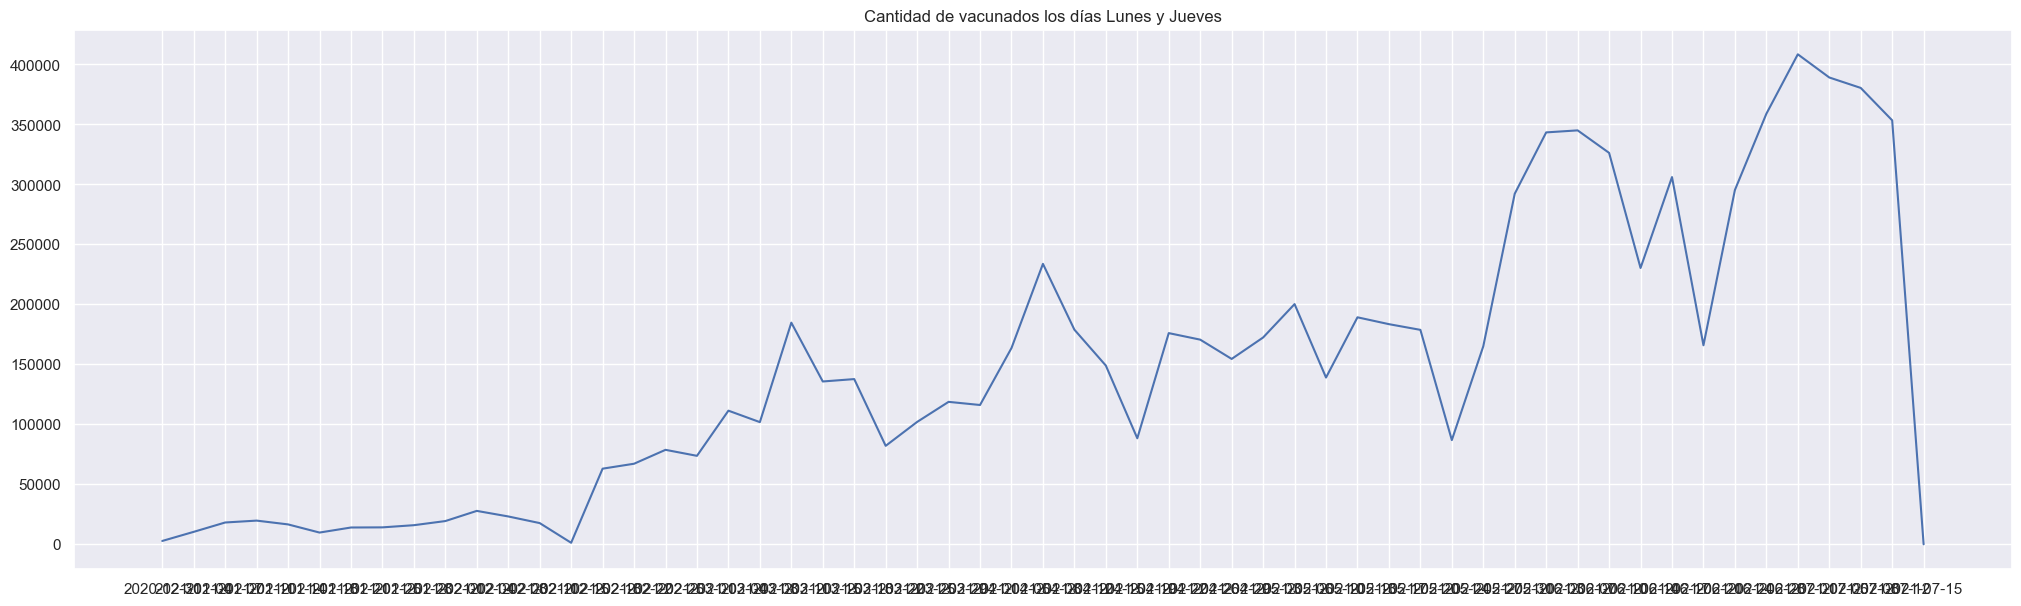

In [132]:
plt.show()

In [40]:
import matplotlib.dates as mdates

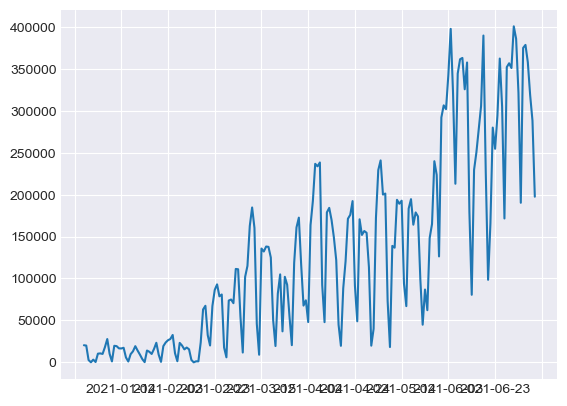

In [41]:
fig, ax = plt.subplots()
ax.plot(fechas_vacunas, data_vacunas.fecha_aplicacion.groupby(data_vacunas.fecha_aplicacion).count().sort_index())
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

In [42]:
print(plt.style.available)
plt.style.use('seaborn-dark')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [43]:
x = totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]

In [133]:
y_conf = totales['Cantidad Confirmados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]
y_test = totales['Cantidad Testeados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]
y_vac = totales['Vacunados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]

In [134]:
# Plot
plt.figure(figsize = (25,7))
plt.style.use('seaborn-darkgrid')
plt.plot(x, y_conf, label = 'Confirmados')
plt.plot(x, y_test, label = 'Testeados')
plt.plot(x, y_vac, label = 'Vacunados')
#plt.legend(loc='upper left')
plt.title("Casos nuevos diarios desde el '2020-07-01'")
plt.legend()
plt.ticklabel_format(style='plain', axis="y")
#plt.xticks(ticks=[x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()], rotation=45)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (57,) and (109,)

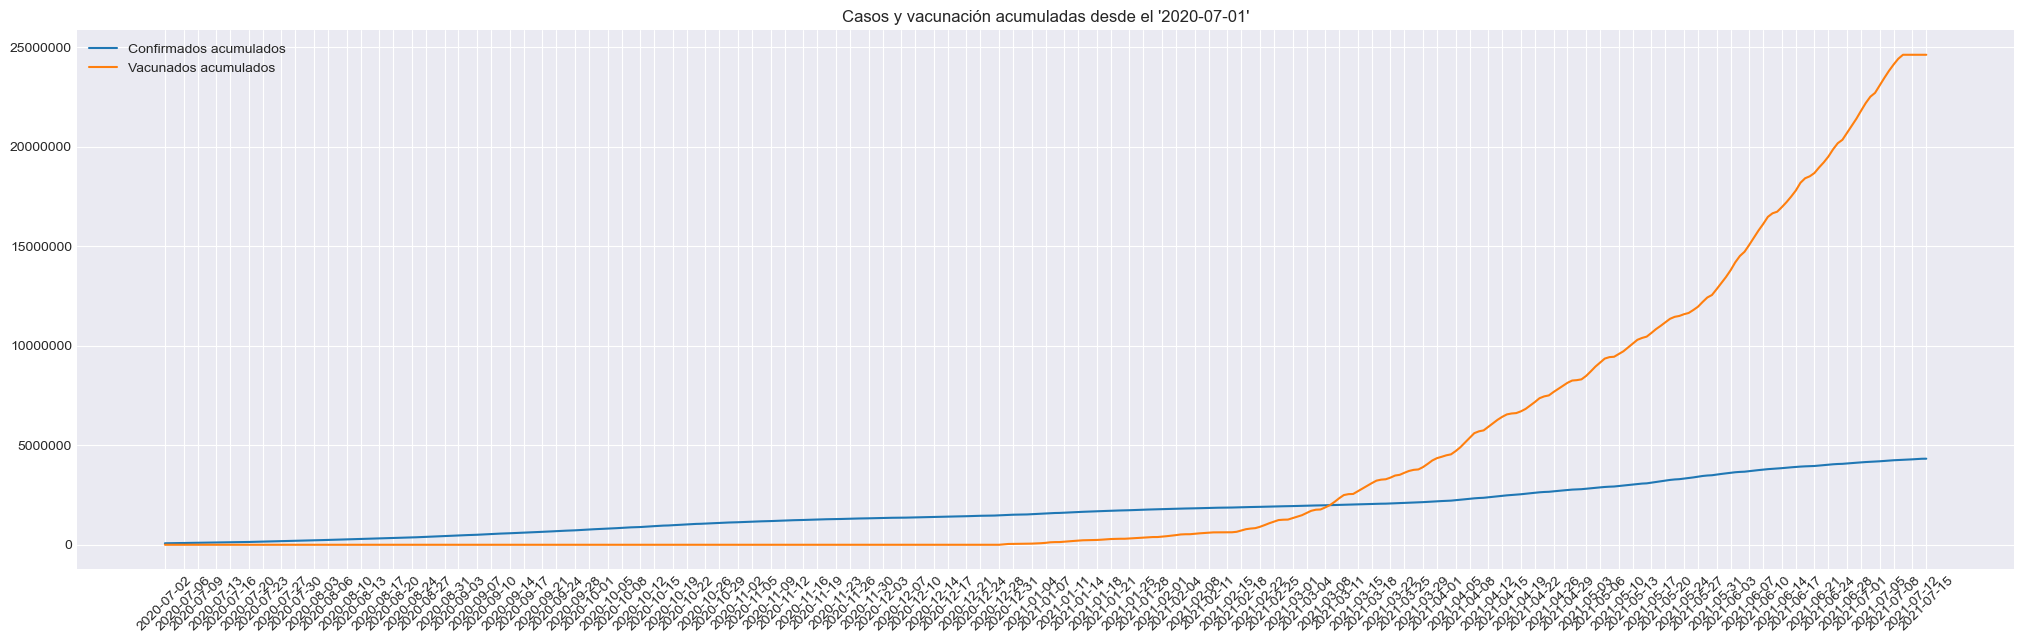

In [46]:
# Plot
x = totales['Cantidad Acumulada Confirmados'][totales.index > '2020-07-01'].index
y = totales['Cantidad Acumulada Confirmados'][totales.index > '2020-07-01']
y2 = totales['Vacunados Acumulados'][totales.index > '2020-07-01']
plt.figure(figsize = (25,7))
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, label = 'Confirmados acumulados')
plt.plot(y2, label='Vacunados acumulados')
#plt.legend(loc='upper left')
plt.title("Casos y vacunación acumuladas desde el '2020-07-01'")
plt.ticklabel_format(style='plain', axis="y")
plt.legend()
plt.xticks(ticks=[x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()], rotation=45)
plt.show()

In [47]:
xticks = pd.to_datetime(["2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01","2021-02-01","2021-03-01","2021-04-01","2021-05-01","2021-06-01","2021-07-01"])

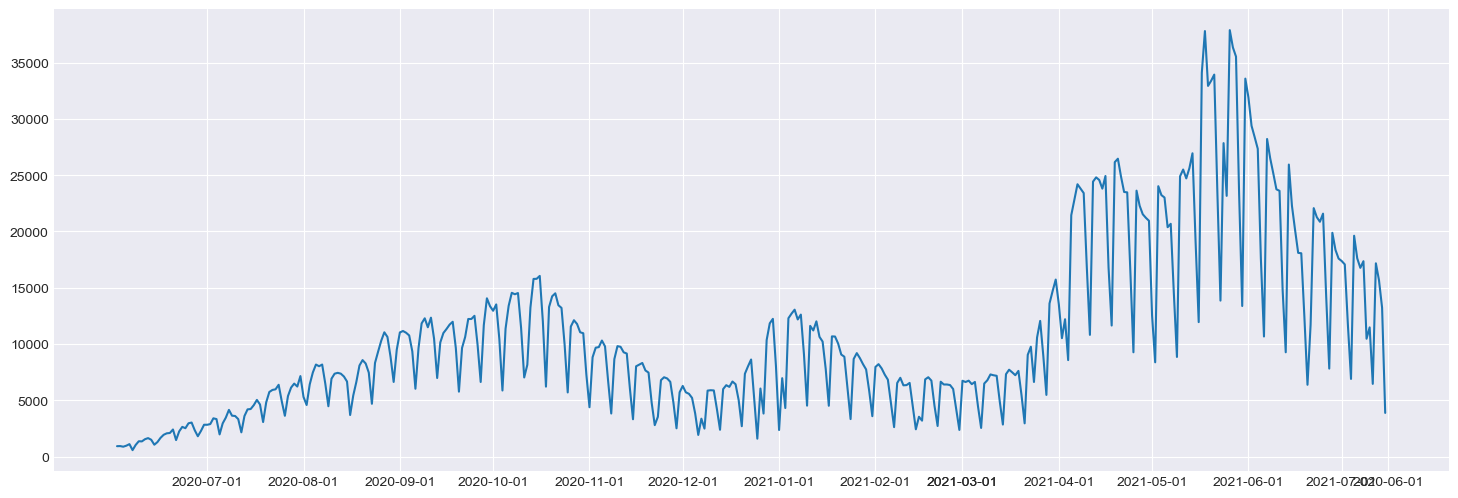

Hoy en día, bajando a 22000 casos confirmados por día aproximadamente.
Resta agregar linea con cantidad de testeos


In [48]:
plt.figure(figsize = (18,6))
plt.style.use('seaborn-darkgrid')
plt.plot(tot[tot.index > '2020-06-01'])
#plt.figure(figsize = (18,6))
plt.xticks(ticks = ["2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01","2021-02-01","2021-03-01","2021-03-01","2021-04-01", "2021-05-01", "2021-06-01", "2021-07-01"])
plt.show()
print('Resta agregar linea con cantidad de testeos')

In [49]:
prim_trim_inf = tot.index[tot.index > '2020-06-01'].sort_values()
prim_trim_sup = tot.index[tot.index < '2020-09-01'].sort_values()
seg_trim_inf = tot.index[tot.index > '2020-09-01'].sort_values()
seg_trim_sup = tot.index[tot.index < '2020-12-01'].sort_values()
ter_trim_inf = tot.index[tot.index > '2020-12-01'].sort_values()
#ter_trim_sup = tot.index > '2020-12-01'

In [39]:
#pd.Series(tot[ter_trim_inf])[10:]

In [50]:
data.clasificacion_resumen[data.fecha_apertura == "2021-05-27"].value_counts()

Descartado        44223
Confirmado        40034
Sospechoso        13412
Sin Clasificar        1
Name: clasificacion_resumen, dtype: int64

In [52]:
plt.figure(figsize = (23,6))
plt.subplot(1, 3, 1)
plt.title("Casos nuevos por día hasta septiembre-20")
#plt.xticks(ticks=xticks)
plt.plot(tot[prim_trim_inf&prim_trim_sup])
plt.subplot(1, 3, 2)
plt.title("Casos nuevos por día desde septiembre-20 hasta diciembre-20")
plt.plot(tot[seg_trim_inf&seg_trim_sup])
plt.subplot(1, 3, 3)
plt.title("Casos nuevos por día desde diciembre-20")
plt.plot(tot[ter_trim_inf])

In [53]:
i = datetime.fromisoformat('2020-04-23')
dates_12_2 = []
while i < datetime.today() - timedelta(days=3):
    dates_12_2.append(i)
    i += timedelta(days=7)

In [455]:
dates[:2]

['2020-06-04', '2020-06-07']

In [54]:
for date in dates_12_2:
    date = datetime.isoformat(date)[:10]
dates_12_2 = [datetime.isoformat(date) for date in dates_12_2]
dates_12_2 = [date[:10] for date in dates_12_2]

In [192]:
#data.fecha_diagnostico.dropna(inplace=True)

In [55]:
mdata = pd.to_datetime(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"]).dt.month
mdata.dropna(inplace=True)
mdata = mdata.astype(str)

C:\Users\bruno\anaconda3\envs\dhdsblend37\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._update_inplace(result)


In [56]:
mcordata = []
for x in mdata:
    mcordata.append(x.replace(".0",""))

In [57]:
adata = pd.to_datetime(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"]).dt.year
adata.dropna(inplace=True)
adata= adata.astype(str)

In [58]:
acordata = []
for x in adata:
    acordata.append(x.replace(".0",""))

In [59]:
data["Date"] = pd.Series(acordata)+"_"+pd.Series(mcordata)

In [60]:
data_graf = data["Date"].dropna()
data_graf

0          2021_4
1          2021_4
2          2021_4
3          2021_4
4          2021_4
            ...  
4324698    2021_4
4324699    2021_4
4324700    2021_4
4324701    2021_4
4324702    2021_4
Name: Date, Length: 4314575, dtype: object

In [61]:
data_graf = pd.to_datetime(data_graf, format="%Y_%m")
data_graf = pd.DataFrame(data_graf)
data_graf["ano"] = pd.Series
data_graf["ano"] = data_graf["Date"].dt.year
data_graf["mes"] = data_graf["Date"].dt.month
data_graf = data_graf[data_graf.ano>=2019]

In [62]:
count = data_graf.groupby([data_graf["ano"],data_graf.mes]).count().rename({"Date":"Cant"},axis="columns")#.sort_values(by="Date",axis=0)
#count = count[count.Cant > 1]
count

Cant
ano  mes        
2019 3         1
     4         1
     9         1
     10        7
     11        1
2020 1        64
     2         8
     3      1082
     4      3431
     5     12891
     6     51214
     7    135475
     8    228929
     9    318120
     10   364998
     11   209997
     12   180517
2021 1    268130
     2    157659
     3    234474
     4    597852
     5    753448
     6    594012
     7    202255

In [63]:
count.query("ano==2021")

Cant
ano  mes        
2021 1    268130
     2    157659
     3    234474
     4    597852
     5    753448
     6    594012
     7    202255

In [64]:
cant_2019 = pd.DataFrame(count.query("ano==2019"))
cant_2020 = pd.DataFrame(count.query("ano==2020"))
cant_2021 = pd.DataFrame(count.query("ano==2021"))

In [66]:
count.plot(kind="bar")

<AxesSubplot:xlabel='ano,mes'>

In [67]:
data.fecha_diagnostico = pd.to_datetime(data.fecha_diagnostico,infer_datetime_format=True)

In [79]:
data.fecha_diagnostico.isna().value_counts()

False    10991491
True       794114
Name: fecha_diagnostico, dtype: int64

In [68]:
per_15d = datetime.strftime(datetime.date(datetime.today()-timedelta(days=15)),"%Y-%m-%d")
per_15d

'2021-06-30'

In [69]:
activos = data[data.fecha_diagnostico>=per_15d]
activos = activos.loc[:,["sexo","edad","carga_provincia_nombre","fallecido","clasificacion","clasificacion_resumen"]]
activos = activos[activos.clasificacion_resumen == "Confirmado"]
activos.head(5)

,sexo,edad,carga_provincia_nombre,fallecido,clasificacion,clasificacion_resumen
2969,F,10.00000,San Luis,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
3731,F,19.00000,San Luis,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
11262,F,69.00000,Tucumán,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
11285,F,41.00000,San Luis,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
12484,M,33.00000,San Luis,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado


In [67]:
activos.fallecido.value_counts()

NO    384522
SI      1593
Name: fallecido, dtype: int64

In [68]:
data.fallecido.loc[(data.clasificacion_resumen=="Descartado") | (data.clasificacion_resumen=="Sospechoso")].value_counts()

NO    8239031
SI      14636
Name: fallecido, dtype: int64

In [87]:
pd.cut(activos.edad,5).value_counts(normalize=True)

(21.8, 42.6]     0.461820
(42.6, 63.4]     0.314079
(0.896, 21.8]    0.119490
(63.4, 84.2]     0.096303
(84.2, 105.0]    0.008309
Name: edad, dtype: float64

In [88]:
pd.cut(data.edad,5).value_counts(normalize=True)

(10.0, 35.0]       0.423688
(35.0, 60.0]       0.404508
(60.0, 85.0]       0.118328
(-15.125, 10.0]    0.041121
(85.0, 110.0]      0.012355
Name: edad, dtype: float64

In [70]:
activos.sexo.value_counts(normalize=True)

F    0.50751
M    0.48826
NR   0.00423
Name: sexo, dtype: float64

In [90]:
#activos.clasificacion.value_counts()

Caso confirmado por laboratorio - No activo (por tiempo de evolución)                        132773
Caso confirmado por laboratorio - Activo                                                     131895
Caso confirmado por laboratorio - Activo Internado                                             6814
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)      1243
Caso confirmado por laboratorio - Fallecido                                                    1204
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                         494
Caso confirmado por criterio clinico-epidemiol¿gico - Activo                                    449
Caso confirmado por criterio clínico - epidemiológico -  Activo internado                        53
Caso confirmado por criterio clínico-epidemiologico - Fallecido                                   2
Name: clasificacion, dtype: int64

In [92]:
activos.head(3)

,sexo,edad,carga_provincia_nombre,fallecido,clasificacion,clasificacion_resumen
151,F,27.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
213,M,18.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
233,M,41.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado


In [71]:
print ("Las provincias que más casos activos tienen son:")
activos.carga_provincia_nombre.value_counts()[:5]

Las provincias que más casos activos tienen son:


Buenos Aires    53457
Córdoba         28194
CABA            23518
Santa Fe        21137
Tucumán          9940
Name: carga_provincia_nombre, dtype: int64

In [72]:
print ("Cantidad de casos confirmados en últimos 15 días:",activos.carga_provincia_nombre.count())
print ("Cantidad de casos analizados en últimos 15 días:",data[data.fecha_diagnostico>per_15d].shape[0])
#print ("Lo que representa un",round(activos.carga_provincia_nombre.count()/data[data.fecha_diagnostico>per_15d].shape[0],2),"% de casos positivos sobre los testeos realizados")

Cantidad de casos confirmados en últimos 15 días: 220364
Cantidad de casos analizados en últimos 15 días: 765595


In [73]:
print ("Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el:", today)
round(data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].value_counts()/data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].count()*100,2)[:5]

Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el: 2021-07-15


CABA           25.55000
Buenos Aires   24.14000
Córdoba        10.12000
Santa Fe        7.61000
Formosa         5.11000
Name: carga_provincia_nombre, dtype: float64

In [74]:
print ("Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el:", today)
round(activos.carga_provincia_nombre.value_counts()/activos.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el: 2021-07-15


Buenos Aires   24.26000
Córdoba        12.79000
CABA           10.67000
Santa Fe        9.59000
Tucumán         4.51000
Name: carga_provincia_nombre, dtype: float64

In [75]:
# Representado en línea anterior a Marzo-21
print ("Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el:", today)
round(activos.carga_provincia_nombre.value_counts()/activos.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el: 2021-07-15


Buenos Aires   24.26000
Córdoba        12.79000
CABA           10.67000
Santa Fe        9.59000
Tucumán         4.51000
Name: carga_provincia_nombre, dtype: float64

In [76]:
print ("Porcentaje de casos analizados en total por provincia hasta el:", today)
round(data.carga_provincia_nombre.value_counts()/data.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos analizados en total por provincia hasta el: 2021-07-15


CABA           27.07000
Buenos Aires   26.29000
Córdoba        11.13000
Santa Fe        6.30000
Tucumán         3.73000
Name: carga_provincia_nombre, dtype: float64

In [77]:
print ("Porcentaje de casos confirmados por provincia sobre total hasta el:", today)
round(data[data.clasificacion_resumen=="Confirmado"].carga_provincia_nombre.value_counts()/data[data.clasificacion_resumen=="Confirmado"].carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre total hasta el: 2021-07-15


Buenos Aires   34.35000
CABA           16.53000
Córdoba         9.34000
Santa Fe        9.10000
Tucumán         3.63000
Name: carga_provincia_nombre, dtype: float64

In [78]:
data_graf2 = data.loc[:,['fecha_diagnostico','clasificacion_resumen']]
data_graf2.dropna(inplace=True)
data_graf2 = pd.DataFrame(data_graf2)
data_graf2['semana'] = data_graf2["fecha_diagnostico"].dt.week
data_graf2.sample(10)

,fecha_diagnostico,clasificacion_resumen,semana
8010357,2020-09-22,Descartado,39
10177308,2020-09-16,Descartado,38
7892027,2020-09-15,Descartado,38
7654174,2020-09-05,Confirmado,36
14787949,2021-04-06,Descartado,14
14513420,2021-04-01,Confirmado,13
2163674,2021-05-04,Confirmado,18
3341882,2021-05-26,Confirmado,21
4851222,2020-07-22,Descartado,30
12428996,2021-02-09,Descartado,6


In [79]:
data_graf2.fecha_diagnostico = pd.to_datetime(data_graf2.fecha_diagnostico, format="%Y-%m-$d")
data_graf2 = data_graf2[data_graf2["fecha_diagnostico"].dt.year>=2021]

In [80]:
data_graf2.sample(5)

,fecha_diagnostico,clasificacion_resumen,semana
1101034,2021-04-23,Confirmado,16
14525592,2021-04-01,Confirmado,13
12874316,2021-02-20,Descartado,7
773844,2021-04-19,Confirmado,16
2158450,2021-05-11,Confirmado,19


In [81]:
data_graf2.semana[data_graf2.semana==53] = 1

In [82]:
count2_conf_week = data_graf2.loc[:,['fecha_diagnostico']][data_graf2.clasificacion_resumen=='Confirmado'].groupby(data_graf2["semana"]).count().rename({"fecha_diagnostico":"Cantidad_Confirmados"},axis="columns")
count2_conf_week

,Cantidad_Confirmados
semana,
1,90112
2,68002
3,58763
4,51976
5,45464
6,39670
7,34621
8,38377
9,40175


In [83]:
count2_tot_week = data_graf2.loc[:,['fecha_diagnostico']].groupby(data_graf2["semana"]).count().rename({"fecha_diagnostico":"Cantidad_Testeados"},axis="columns")
# Era igual a:
# data_graf2.semana.value_counts().sort_index()
count2_tot_week

,Cantidad_Testeados
semana,
1,342213
2,289283
3,273078
4,271125
5,268079
6,268121
7,252678
8,247581
9,225429


In [84]:
data_graf_week = pd.DataFrame(count2_conf_week)

In [85]:
data_graf_week['Cantidad_Total'] = count2_tot_week

In [86]:
data_graf_week

,Cantidad_Confirmados,Cantidad_Total
semana,,
1,90112,342213
2,68002,289283
3,58763,273078
4,51976,271125
5,45464,268079
6,39670,268121
7,34621,252678
8,38377,247581
9,40175,225429


In [87]:
plt.figure(figsize=(20,7))
plt.hist(data_graf2.semana[data_graf2.clasificacion_resumen=='Confirmado'], bins=16, alpha = 0.5, label = 'Confirmados', color= 'blue')
plt.hist(data_graf2.semana[data_graf2.clasificacion_resumen!='Confirmado'], bins=16, alpha = 0.5, label = 'Testeados')
plt.xticks(range(1,len(data_graf_week)+1))
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [88]:
data.clasificacion_resumen[data.clasificacion_resumen=='Confirmado'].count()/data.clasificacion_resumen[data.clasificacion_resumen!='Confirmado'].count()

0.46243513848943574

In [782]:
# Mortalidad en rango 15-30

In [89]:
rango_joven = np.logical_and(data.edad<31, data.edad>14)
len(data.fallecido[data.fallecido=='SI'][rango_joven])

1364

In [ ]:
# Cantidad de vacunados por rango etario

## Casos en particular

In [69]:
data.residencia_provincia_nombre.unique()

array(['CABA', 'Buenos Aires', 'Santa Fe', 'Entre Ríos',
       'Tierra del Fuego', 'Córdoba', 'San Luis', 'Río Negro', 'Mendoza',
       'Santa Cruz', 'Corrientes', 'La Pampa', 'SIN ESPECIFICAR', 'Chaco',
       'Formosa', 'Salta', 'Neuquén', 'Misiones', 'Santiago del Estero',
       'Tucumán', 'Chubut', 'San Juan', 'Catamarca', 'La Rioja', 'Jujuy'],
      dtype=object)

In [91]:
data[(data.residencia_departamento_nombre=='Los Lagos') & (data.fecha_diagnostico>'2021-05-04') & (data.clasificacion_resumen == 'Confirmado')][:4]

,sexo,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,ultima_actualizacion,Date
1226529,M,63.0,Argentina,Neuquén,Los Lagos,Neuquén,2021-04-26,17,NO,NaN,NO,NaN,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2021-05-08,2021-05-21,2020_8
1323424,M,39.0,Argentina,Neuquén,Los Lagos,Neuquén,2021-04-27,17,NO,NaN,NO,NaN,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2021-05-13,2021-05-21,2020_9
1400308,F,45.0,Argentina,Neuquén,Los Lagos,Neuquén,2021-04-28,17,NO,NaN,NO,NaN,Público,Caso confirmado por laboratorio - Activo Inter...,Confirmado,2021-05-11,2021-05-21,2020_9
1492246,M,52.0,Argentina,Neuquén,Los Lagos,Neuquén,2021-04-29,17,NO,NaN,NO,NaN,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2021-05-19,2021-05-21,2020_9


In [90]:
len(data[(data.residencia_departamento_nombre=='Los Lagos') & (data.fecha_diagnostico>'2021-06-26') & (data.clasificacion_resumen == 'Confirmado')])

42

In [91]:
len(data[(data.fecha_diagnostico>'2021-06-26') & (data.clasificacion_resumen == 'Confirmado') & (data.cuidado_intensivo=='SI')])

856

In [92]:
data[(data.residencia_departamento_nombre=='Los Lagos') & (data.fecha_diagnostico>'2021-06-26') & (data.clasificacion_resumen == 'Confirmado')].edad.describe()

count   42.00000
mean    38.66667
std     11.18070
min     12.00000
25%     33.25000
50%     40.50000
75%     44.00000
max     56.00000
Name: edad, dtype: float64

In [93]:
# Identificar cantidad de fallecidos expresados en porcentaje, por franja etaria
data.fallecido.groupby(data.edad[data.fallecido!='NO']).count().rename('Cantidad',axis='columns')

edad
1.00000      73
2.00000      37
3.00000      15
4.00000      17
5.00000       8
             ..
105.00000     7
106.00000     7
107.00000     5
108.00000     2
110.00000     1
Name: Cantidad, Length: 109, dtype: int64

In [94]:
# Cantidad de fallecidos por edad
data.edad[data.fallecido!='NO'].groupby(data.edad).count()[10:15]

edad
10.00000    15
11.00000     4
12.00000     8
13.00000    15
14.00000    10
15.00000    26
Name: edad, dtype: int64

In [95]:
index_edades_significativas_fallecidos = data.edad[data.fallecido!='NO'].groupby(data.edad).count()[data.edad[data.fallecido!='NO'].groupby(data.edad).count()>=30].index

In [96]:
# Cantidad de contagiados por edad
index_edades_significativas_contagiados = data.edad[data.clasificacion_resumen=='Confirmado'].groupby(data.edad).count()[data.edad[data.clasificacion_resumen=='Confirmado'].groupby(data.edad).count()>=30].index

In [97]:
index_edades_significativas = index_edades_significativas_fallecidos.join(index_edades_significativas_contagiados)

In [98]:
index_edades_significativas = pd.Series(index_edades_significativas.values)
index_edades_significativas

0      1.00000
1      2.00000
2     17.00000
3     18.00000
4     19.00000
        ...   
84    99.00000
85   100.00000
86   101.00000
87   102.00000
88   103.00000
Length: 89, dtype: float64

In [99]:
data.edad[data.clasificacion_resumen=='Confirmado'].groupby(data.edad).count()[data.edad[data.clasificacion_resumen=='Confirmado'].groupby(data.edad).count()>30]

edad
1.00000      13073
2.00000      11570
3.00000       9917
4.00000       9970
5.00000      10334
             ...  
99.00000       490
100.00000      334
101.00000      227
102.00000      113
103.00000       70
Name: edad, Length: 103, dtype: int64

In [100]:
# Proporción de contagiados por edad
fallec_x_edad = ((data.edad[data.fallecido!='NO'].groupby(data.edad).count())/(data.edad[data.clasificacion_resumen=='Confirmado'].groupby(data.edad).count()))*100
fallec_x_edad_df = pd.DataFrame({'proporción':fallec_x_edad.values}, index = fallec_x_edad.index)
fallec_x_edad_df = fallec_x_edad_df.iloc[index_edades_significativas] # Filtro edades con cantidad de casos significativos
fallec_x_edad_df = fallec_x_edad_df[fallec_x_edad_df.proporción > 0.6] # Filtro edades que tengan una proporción significativa de mortalidad

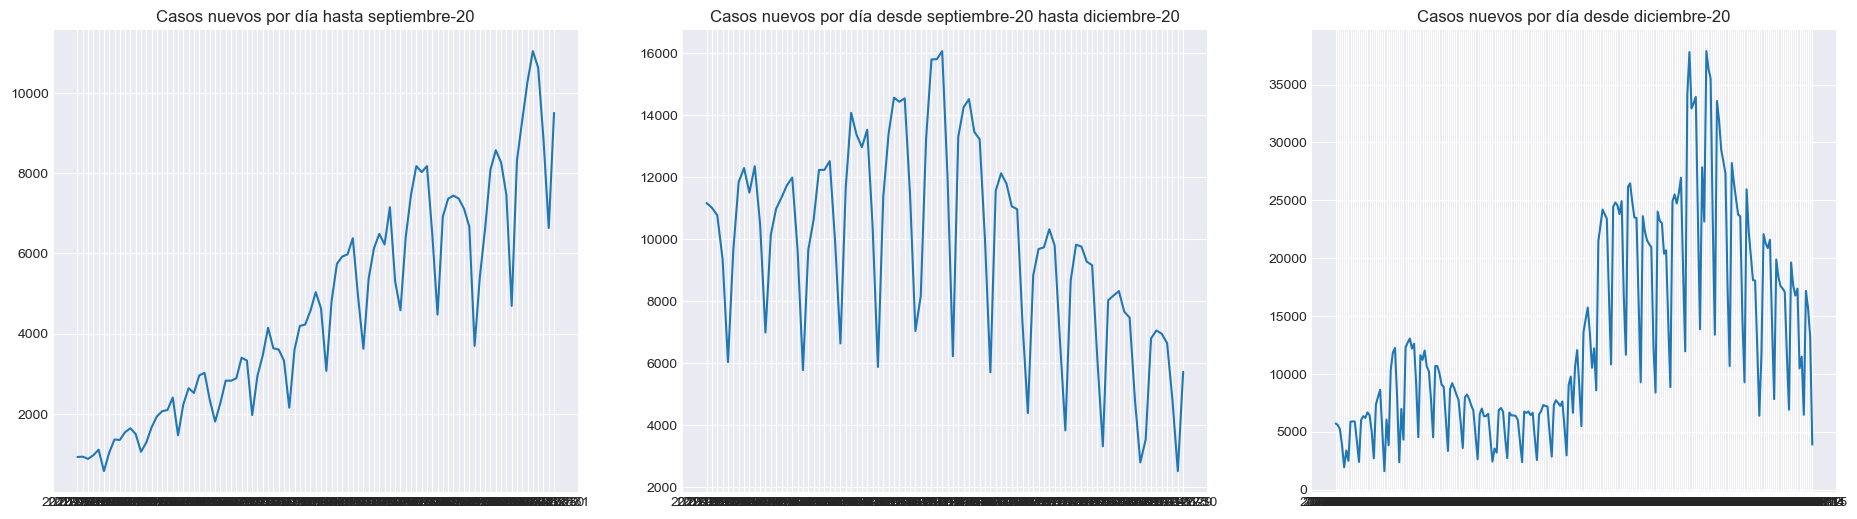

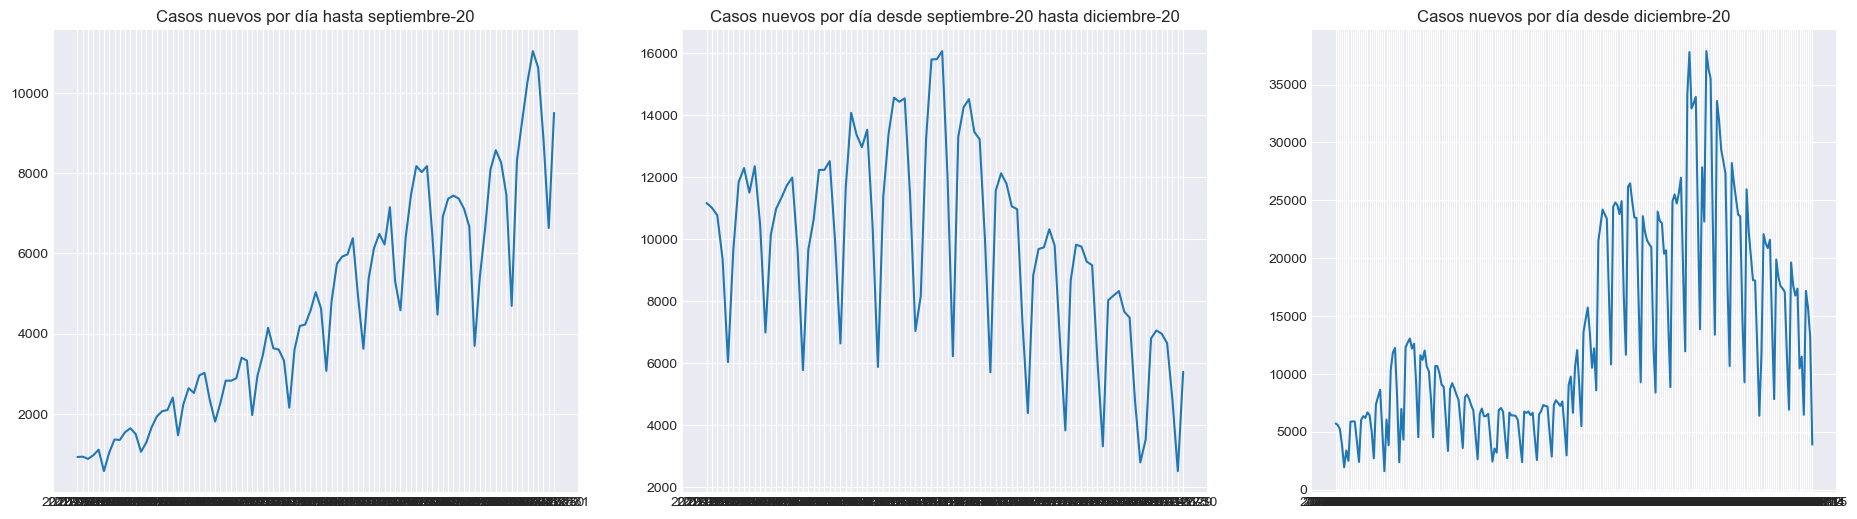

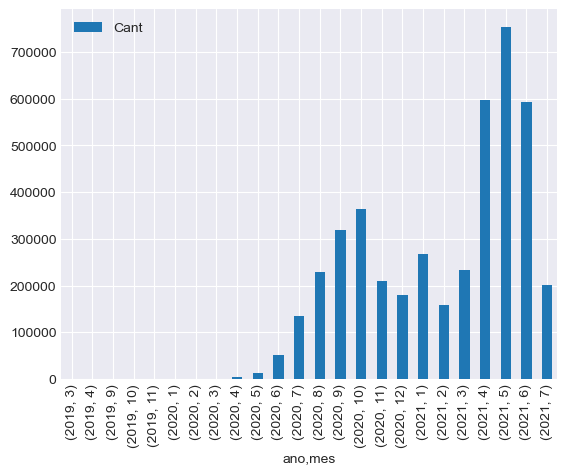

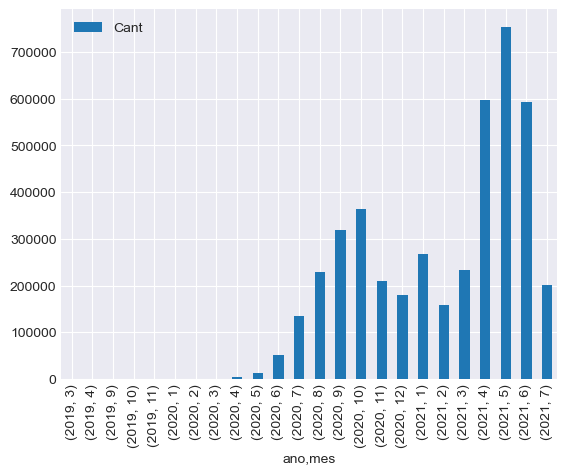

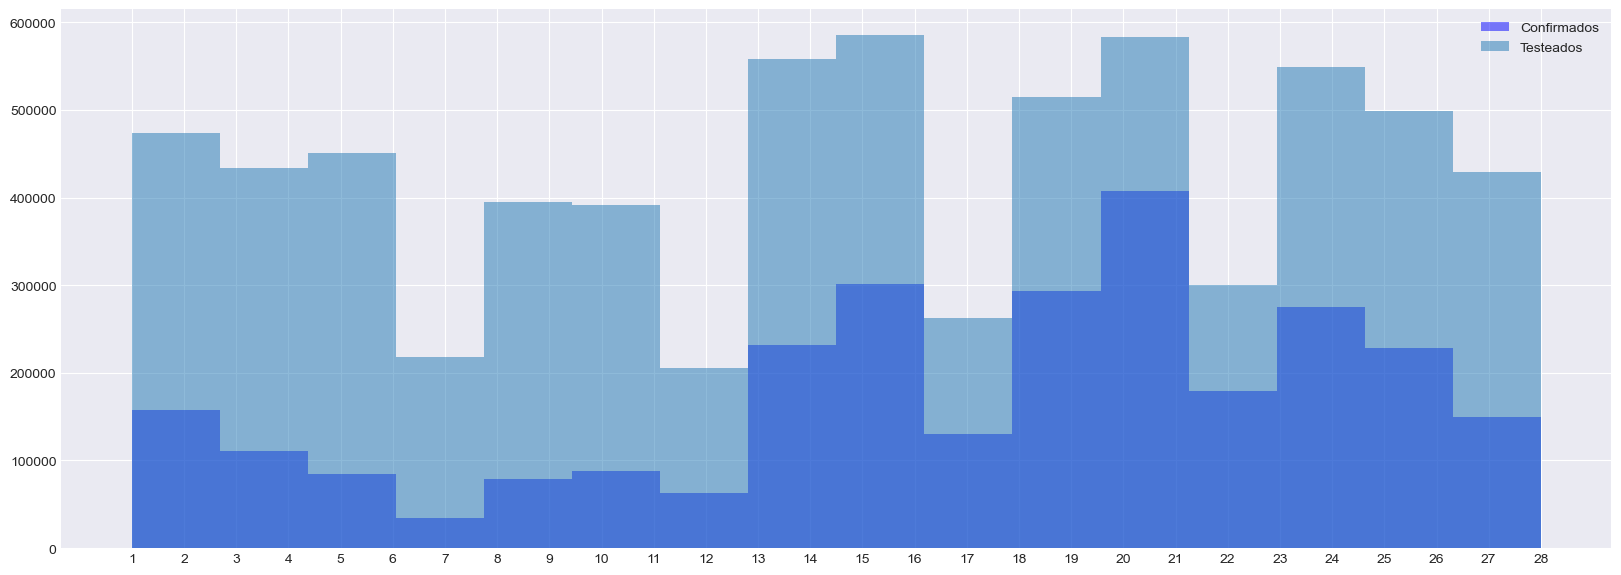

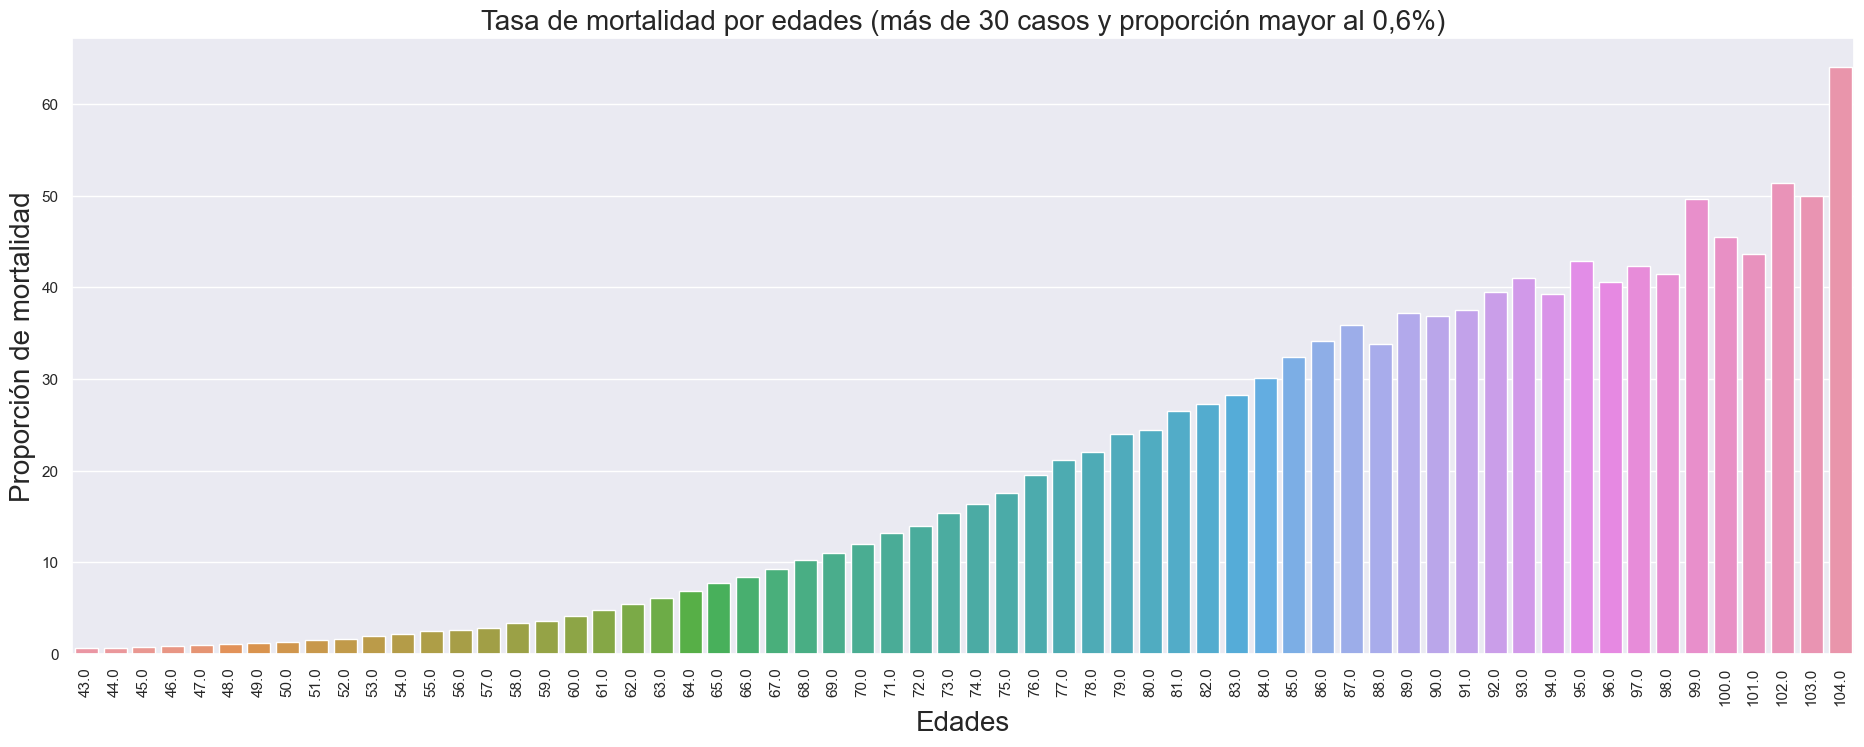

In [101]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.figure(figsize=(23,8))
sns.barplot(fallec_x_edad_df.index, fallec_x_edad_df.proporción)
plt.title('Tasa de mortalidad por edades (más de 30 casos y proporción mayor al 0,6%)', fontsize=20)
plt.xticks(rotation='vertical')
plt.xlabel('Edades', fontsize=20)
plt.ylabel('Proporción de mortalidad', fontsize=20)
plt.show()


In [102]:
data_simp = data.loc[:,['sexo','edad','fallecido', 'clasificacion_resumen','fecha_diagnostico']][np.logical_or(data.residencia_provincia_nombre == 'CABA', data.residencia_provincia_nombre =='Buenos Aires')]

In [103]:
data_simp.head()

,sexo,edad,fallecido,clasificacion_resumen,fecha_diagnostico
0,M,54.00000,NO,Descartado,2020-06-09
1,F,52.00000,NO,Descartado,2021-04-08
2,F,22.00000,NO,Descartado,2021-04-08
3,F,44.00000,NO,Descartado,2021-04-06
4,F,34.00000,NO,Descartado,2021-04-08


In [106]:
#fallec_x_edad_df_AMBA = pd.DataFrame({'proporción':fallec_x_edad_AMBA.values}, index = fallec_x_edad_AMBA.index)
#fallec_x_edad_df_AMBA = fallec_x_edad_df_AMBA.iloc[index_edades_significativas] # Filtro edades con cantidad de casos significativos
#fallec_x_edad_df_AMBA = fallec_x_edad_df_AMBA[fallec_x_edad_df_AMBA.proporción > 0.6] # Filtro edades que tengan una proporción significativa de mortalidad

In [107]:
pd.DataFrame(data_simp.edad[data_simp.fallecido!='NO'].groupby(by=[data_simp.edad,data_simp.sexo]).count())

edad
edad      sexo      
1.00000   F        5
          M       10
          NR      33
2.00000   F        8
          M       13
...              ...
106.00000 NR       1
107.00000 F        4
          NR       1
108.00000 F        1
110.00000 F        1

[304 rows x 1 columns]

In [105]:
plt.figure(figsize=(23,8))
#sns.barplot(fallec_x_edad_df_AMBA.index, fallec_x_edad_df_AMBA.proporción)
plt.title('Tasa de mortalidad por edades en AMBA (más de 30 casos y proporción mayor al 0,6%)', fontsize=20)
plt.xticks(rotation='vertical')
plt.xlabel('Edades', fontsize=20)
plt.ylabel('Proporción de mortalidad', fontsize=20)
plt.show()

NameError: name 'fallec_x_edad_df_AMBA' is not defined

In [ ]:
#fallec_x_edad_df_AMBA.edad.describe

<Figure size 2300x800 with 0 Axes>

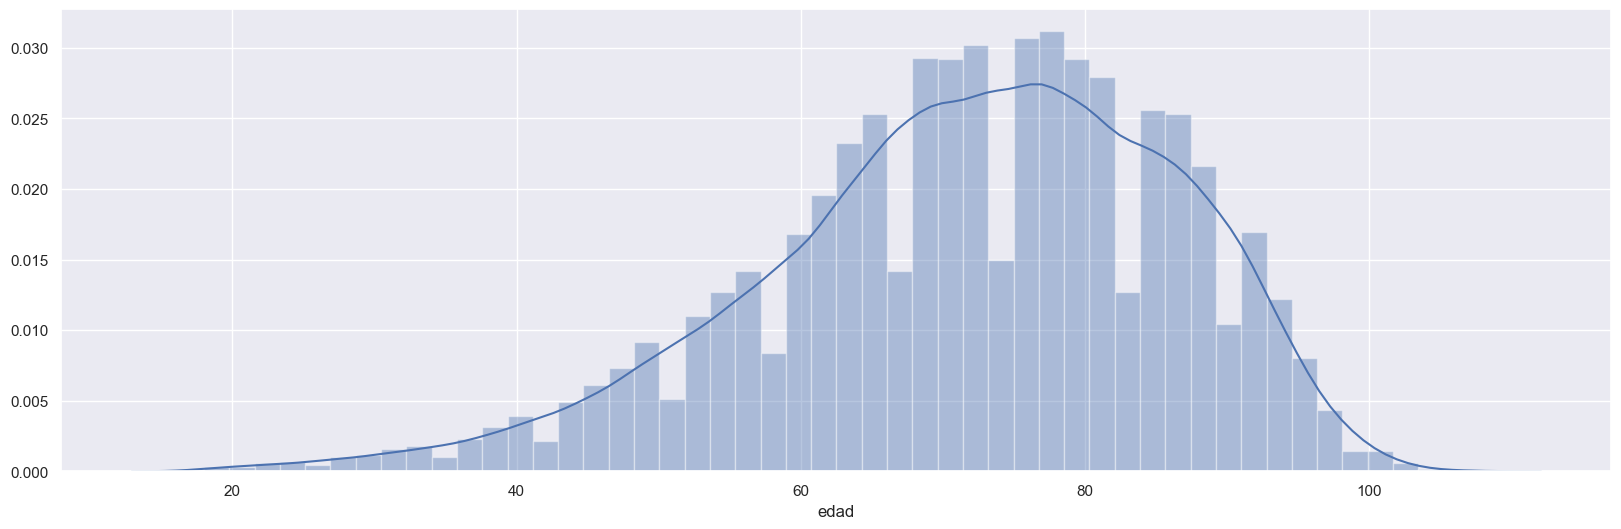

In [108]:
plt.figure(figsize=(20,6))
sns.distplot(data_simp[np.logical_and(data_simp.clasificacion_resumen == 'Confirmado', np.logical_and(data_simp.edad>17, data_simp.fallecido == 'SI'))].edad)
plt.show()
# Son 28000 casos aprox total

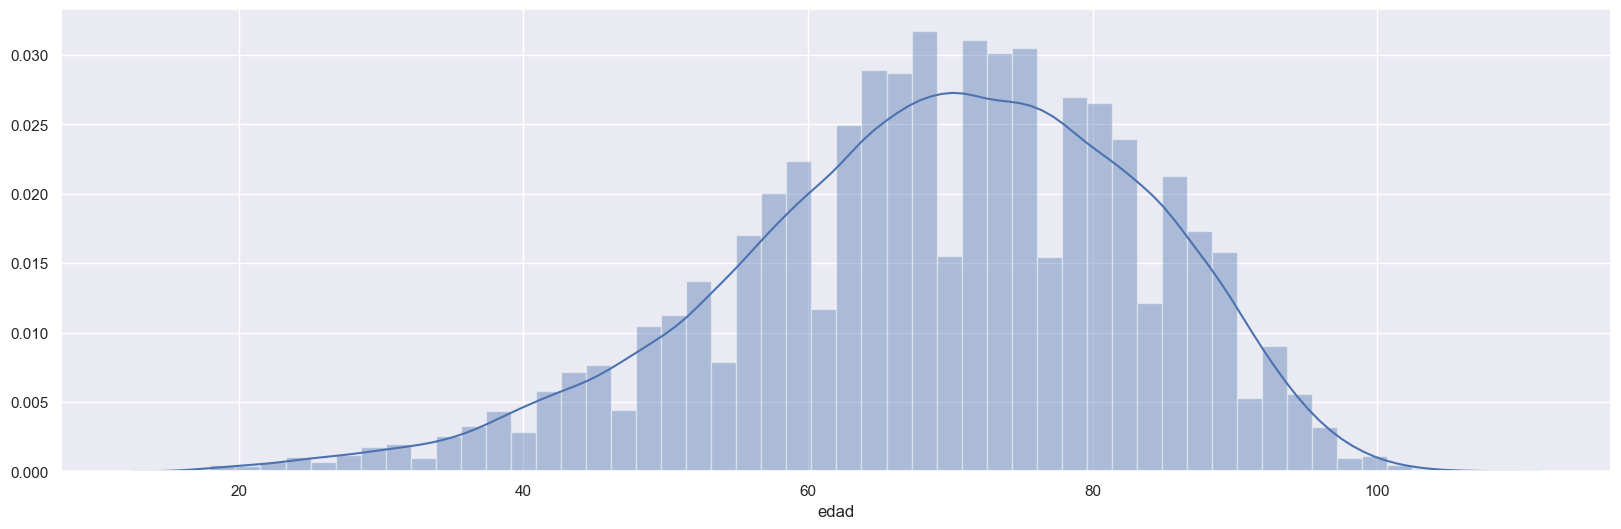

In [109]:
plt.figure(figsize=(20,6))
sns.distplot(data[np.logical_and(np.logical_and(data.residencia_provincia_nombre!='CABA', data.residencia_provincia_nombre!='Buenos Aires'), np.logical_and(data.clasificacion_resumen == 'Confirmado', np.logical_and(data.edad>17, data.fallecido == 'SI')))].edad)
plt.show()
# Son 28000 casos aprox total

In [360]:
print('Distribución de edad fuera de AMBA:','\n', data[np.logical_and(np.logical_and(data.residencia_provincia_nombre!='CABA', data.residencia_provincia_nombre!='Buenos Aires'), data.edad>59)].edad.describe())
print()
print('Distribución de edad en AMBA:','\n', data[np.logical_and(np.logical_or(data.residencia_provincia_nombre=='CABA', data.residencia_provincia_nombre=='Buenos Aires'), data.edad>59)].edad.describe())

Distribución de edad fuera de AMBA: 
 count   710639.00000
mean        70.23038
std          8.52753
min         60.00000
25%         63.00000
50%         68.00000
75%         75.00000
max        109.00000
Name: edad, dtype: float64

Distribución de edad en AMBA: 
 count   906082.00000
mean        71.08231
std          9.22218
min         60.00000
25%         64.00000
50%         69.00000
75%         77.00000
max        110.00000
Name: edad, dtype: float64


In [ ]:
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

### Hacer mismo gráfico de barras pero diferenciando por sexo

### Hacer mismo gráfico de barras pero diferenciando con 30% de mayores vacunados

plt.figure(figsize=(23,8))
sns.barplot(fallec_x_edad_df_AMBA.index, fallec_x_edad_df_AMBA.proporción)
plt.title('Tasa de mortalidad por edades en AMBA(más de 30 casos y proporción mayor al 0,6%)', fontsize=20)
plt.xticks(rotation='vertical')
plt.xlabel('Edades', fontsize=20)
plt.ylabel('Proporción de mortalidad', fontsize=20)
plt.show()

### Hacer mismo gráfico de barras identificando rango etario de más contagiados

In [29]:
data_vacunas.depto_residencia.value_counts()

Capital                    2558612
COMUNA 1                   1313648
Rosario                     742399
La Matanza                  669829
La Plata                    596239
                            ...   
Mitre                          411
Limay Mahuida                  280
Lihuel Calel                   202
Antártida Argentina            119
Islas del Atlántico Sur          3
Name: depto_residencia, Length: 447, dtype: int64

In [110]:
data_vacunas[np.logical_and(data_vacunas.depto_aplicacion=='Almirante Brown', data_vacunas.jurisdiccion_aplicacion=='Buenos Aires')]

,sexo,grupo_etario,jurisdiccion_residencia,depto_residencia,jurisdiccion_aplicacion,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
435,F,70-79,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-04-04,Sputnik,60 o más años,1
672,F,40-49,Santiago del Estero,Atamisqui,Buenos Aires,Almirante Brown,2021-06-06,AstraZeneca,Salud,1
1011,F,80-89,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-06-14,Sputnik,60 o más años,2
1012,F,80-89,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-03-17,Sputnik,60 o más años,1
1064,M,50-59,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-05-05,Sputnik,18 a 59 años CON Factores de Riesgo,1
...,...,...,...,...,...,...,...,...,...,...
24616365,M,30-39,Chaco,Maipú,Buenos Aires,Almirante Brown,2021-07-04,AstraZeneca,18 a 59 años CON Factores de Riesgo,1
24616396,F,30-39,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-03,AstraZeneca,18 a 59 años CON Factores de Riesgo,1
24616560,M,30-39,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-06-05,AstraZeneca,Salud,1
24616669,F,40-49,Buenos Aires,Quilmes,Buenos Aires,Almirante Brown,2021-05-28,AstraZeneca,Salud,2


In [38]:
data_vacunas[np.logical_and(data_vacunas.depto_aplicacion=='Almirante Brown', data_vacunas.jurisdiccion_aplicacion=='Buenos Aires')].depto_residencia.value_counts()

Almirante Brown            253020
Lomas de Zamora              5243
COMUNA 1                     3823
La Plata                     3577
Quilmes                      2328
                            ...  
Toay                            1
San Blas de los Sauces          1
Andalgalá                       1
Chilecito                       1
General Manuel Belgrano         1
Name: depto_residencia, Length: 333, dtype: int64

In [111]:
data_vacunas[np.logical_and(data_vacunas.depto_aplicacion=='Almirante Brown', data_vacunas.jurisdiccion_aplicacion=='Buenos Aires')][data_vacunas.fecha_aplicacion>'2021-06-28']

C:\Users\bruno\anaconda3\envs\dhdsblend37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,sexo,grupo_etario,jurisdiccion_residencia,depto_residencia,jurisdiccion_aplicacion,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
1832,F,30-39,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-08,Sputnik,18 a 39 años SIN Factores de Riesgo,1
1910,M,30-39,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-04,Sinopharm,18 a 59 años CON Factores de Riesgo,1
2224,M,40-49,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-03,Sinopharm,Estratégico,1
2298,M,70-79,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-05,AstraZeneca,60 o más años,2
3081,F,40-49,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-04,Sinopharm,50 a 59 años SIN Factores de Riesgo,1
...,...,...,...,...,...,...,...,...,...,...
24615279,F,60-69,Buenos Aires,Pinamar,Buenos Aires,Almirante Brown,2021-07-05,AstraZeneca,60 o más años,2
24615550,F,30-39,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-08,Sputnik,18 a 39 años SIN Factores de Riesgo,1
24615974,F,80-89,Buenos Aires,Almirante Brown,Buenos Aires,Almirante Brown,2021-07-09,Sputnik,60 o más años,2
24616365,M,30-39,Chaco,Maipú,Buenos Aires,Almirante Brown,2021-07-04,AstraZeneca,18 a 59 años CON Factores de Riesgo,1


In [135]:
data_vac = data_vacunas[np.logical_and(data_vacunas.depto_aplicacion=='Almirante Brown', data_vacunas.jurisdiccion_aplicacion=='Buenos Aires')][data_vacunas.fecha_aplicacion>'2021-07-05']

C:\Users\bruno\anaconda3\envs\dhdsblend37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [122]:
#data_vac.loc[:,['vacuna','fecha_aplicacion', 'grupo_etario', 'sexo', 'depto_aplicacion']].groupby(['fecha_aplicacion','vacuna', 'grupo_etario', 'sexo']).count()

depto_aplicacion
fecha_aplicacion vacuna      grupo_etario sexo                  
2021-07-02       AstraZeneca 18-29        F                  142
                                          M                  107
                             30-39        F                  137
                                          M                  144
                             40-49        F                  553
...                                                          ...
2021-07-10       Sputnik     70-79        M                    4
                             80-89        F                   23
                                          M                    9
                             90-99        F                    4
                                          M                    3

[381 rows x 1 columns]

In [136]:
vac1 = data_vac.loc[:,['vacuna','fecha_aplicacion', 'grupo_etario', 'sexo', 'depto_aplicacion']].groupby(['fecha_aplicacion','vacuna', 'grupo_etario', 'sexo']).count()

In [139]:
vac1[350:375]

depto_aplicacion
fecha_aplicacion vacuna    grupo_etario sexo                  
2021-07-14       Sinopharm 40-49        M                  149
                           50-59        F                   28
                                        M                   42
                           60-69        F                    9
                                        M                    4
                           70-79        F                    6
                                        M                    2
                           80-89        F                    2
                           90-99        M                    1
                 Sputnik   18-29        F                   23
                                        M                    8
                           30-39        F                  842
                                        M                  966
                           40-49        F                   88
                                        M                   85
                           50-59        F                   28
                                        M                   23
                           60-69        F                    5
                                        M                    5
                           70-79        F                    2
                                        M                    2
                           80-89        F                   10
                                        M                    2
                           90-99        F                    1
                                        M                    1

In [140]:
vac = data_vac.loc[:,['vacuna','fecha_aplicacion', 'sexo']].groupby(['fecha_aplicacion','vacuna']).count()
vac

sexo
fecha_aplicacion vacuna           
2021-07-06       AstraZeneca  3044
                 Sinopharm    1294
                 Sputnik       266
2021-07-07       AstraZeneca  3259
                 Sinopharm     685
                 Sputnik       986
2021-07-08       AstraZeneca   224
                 Sinopharm    1208
                 Sputnik      2438
2021-07-09       AstraZeneca   695
                 Sinopharm     888
                 Sputnik      4432
2021-07-10       AstraZeneca  1077
                 Sinopharm    3497
                 Sputnik      1398
2021-07-11       AstraZeneca  1009
                 Sinopharm    1905
                 Sputnik      1027
2021-07-12       AstraZeneca   105
                 Sinopharm    3406
                 Sputnik      1163
2021-07-13       AstraZeneca    69
                 Sinopharm    2749
                 Sputnik      1810
2021-07-14       AstraZeneca   674
                 Sinopharm    2681
                 Sputnik      2091